In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
import cv2

# pywt

https://blog.csdn.net/weixin_44921013/article/details/109806933

## families

In [4]:
print(pywt.families(short=True))

# 返回软件内含的小波族。short：是否简写

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


## wavelist

In [5]:
pywt.wavelist(family=None, kind='all')

# 返回该小波族（family）中包含的小波名称。
# --- family：简写小波族名称。如果为默认的None，则返回所有的小波名称。
# --- kind：’all’、’continuous’、’discrete’（离散或连续小波）

print(pywt.wavelist(kind='continuous'))

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


## Wavelet

离散小波 Object

In [6]:
wavelet = pywt.Wavelet(name='haar', filter_bank=None)

print(wavelet)

# 描述由指定的小波名称标识的离散小波的性质的一个类（创建小波对象）。
# --- name：小波名称
# --- filter_bank：使用用户提供的滤波器组

# [dec_lo, dec_hi, rec_lo, rec_hi]

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


## wavefun

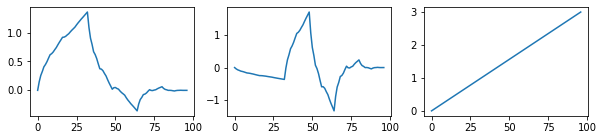

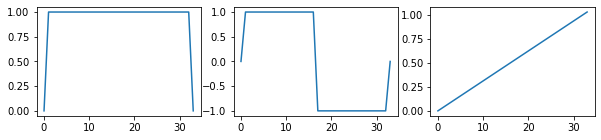

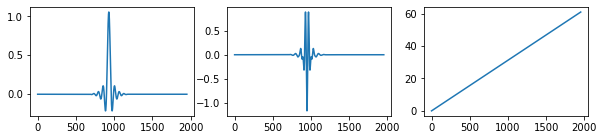

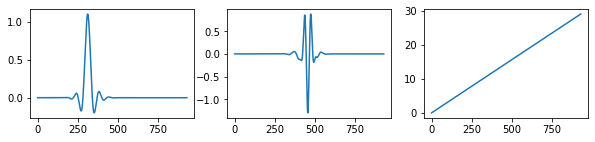

In [7]:
def visualize_wavelet(wname):
    wavelet = pywt.Wavelet(wname)
    # wavelet.wavefun()
    [phi, psi, x] = wavelet.wavefun(level=5)
    # 在给定的分解阶次上依据小波系数近似给出尺度函数（phi）和小波函数（psi）。
    # The wavefun() method can be used to calculate approximations of scaling function (phi) 
    # and wavelet function (psi) at the given level of refinement.

    plt.figure(figsize=(10,2))
    
    for i, w in enumerate([phi, psi, x]):
        plt.subplot(1,3,i+1)
        plt.plot(w)
    plt.show()
    
visualize_wavelet('db2')
visualize_wavelet('haar')
visualize_wavelet('dmey')
visualize_wavelet('coif5')

## central_frequency

In [8]:
pywt.central_frequency('cgau8', precision=8)
# 计算小波函数的中心频率。
# --- wavelet：小波实例（str、tuple）
# --- precision：用wavefun计算的用于小波函数逼近的精度(level=precision)

0.7

## cwt

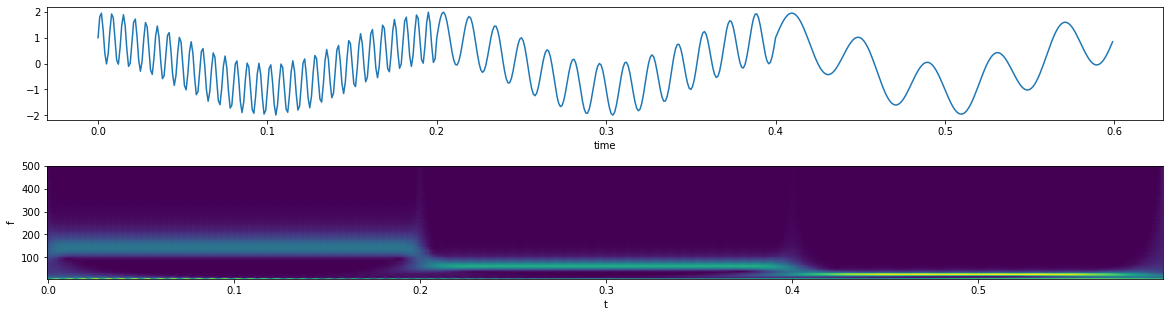

In [2]:
# [cwtmatr, frequencies] = pywt.cwt(data, scales, wavelet)
# 连续小波变换
# --- data : array_like， 信号数组
# --- scales : 要使用的小波尺度（s）。
#              可以用 *f = scale2frequency(wavelet, scale)/sampling_period 来确定物理频率大小。
#              f的单位是赫兹，采样周期的单位为秒。
# --- wavelet : Wavelet 对象或名字
# --- sampling_period : float
#              频率输出的采样周期。coefs的计算值与sampling_period的选择无关。scales不按抽样周期进行缩放。
# --- axis: int, optional
#              计算CWT的轴。如果不给出，则使用最后一个轴。

# Returns
# --- coefs : array_like，给定尺度和小波的输入信号的连续小波变换。第一维是scales，其余为data
# --- frequencies : array_like。如果采样周期的单位是秒，那么频率的单位是赫兹。否则，假设采样周期为1。

from wavelet_t import wavelet_cwt

t, frequencies, cwtmatr = wavelet_cwt(totalscal=128)

## dwt
离散小波变换DWT：

CWT的“连续性”，以及它与离散小波变换的区别，是它运行的尺度和位置集。 与离散小波变换不同，CWT可以在每一个尺度上进行操作，从原始信号的尺度到某个最大尺度。（当然对于计算机来说，也是从中抽取一定数量的离散尺度）

而且CWT在移位方面也是连续的，即在计算过程中，分析函数的整个域上平滑地移位（对于计算机来说，也是根据时间分辨率来离散的移位）。

下面的函数把信号分成了低频近似和高频细节两个部分：

https://blog.csdn.net/tiao_god/article/details/112253488

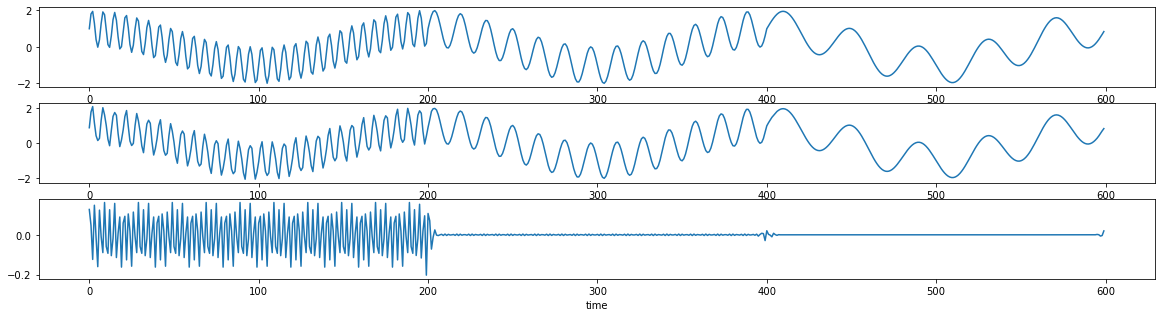

In [3]:
from wavelet_t import wavelet_dwt

wavelet_dwt()
# cA, cD = pywt.dwt(data, wavelet, mode='symmetric', axis=-1)

## wavedec 多层离散小波变换

600
600
600
600


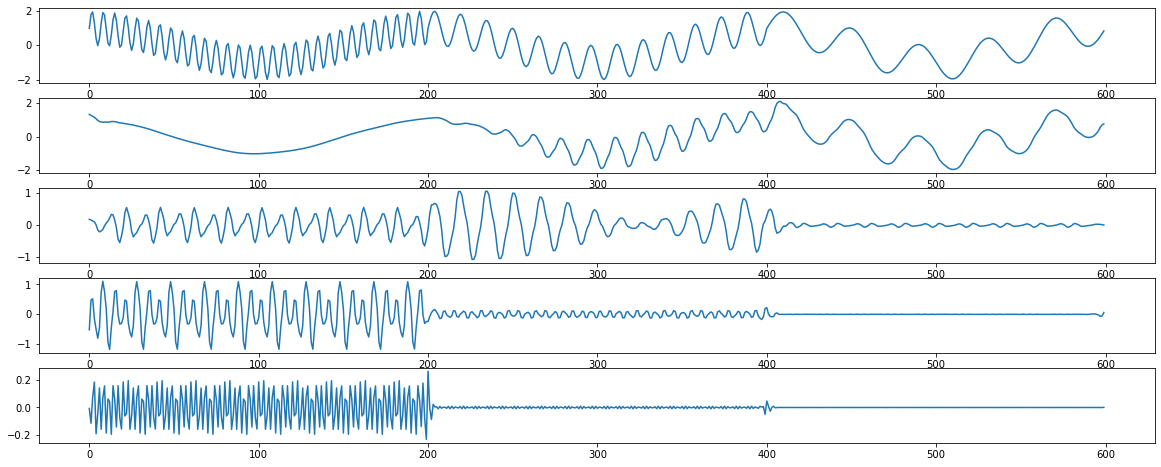

In [4]:
from wavelet_t import wavelet_dec

plt.figure(figsize=(20,8))
wavelet_dec()

# 分解成了 cA, cD3, cD2, cD1
# cA 是近似分量，cD是细节分量

# 应用
## Haar 变换

https://blog.csdn.net/wsp_1138886114/article/details/116780542

### 一维Haar

Haar 小波是最简单的小波基函数。

比如

data = [a1, a2, a3, a4]

Haar：

$h_{high} = (\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}})$, $h_{low} = (\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}})$

1. 计算两数之间的均值 $ [(a1+a2)*\frac{1}{\sqrt{2}}, (a3+a4)*\frac{1}{\sqrt{2}}]$

2. 计算两数之间的差  $ [(a1-a2)*\frac{1}{\sqrt{2}}, (a3-a4)*\frac{1}{\sqrt{2}}]$

In [21]:
cA1, cD1 = pywt.dwt([1,2,3,4,1,4,3,2], 'Haar')
print('cA1 ', cA1)
print('cD1 ', cD1)

cA2, cD2 = pywt.dwt(cA1, 'Haar')
print('cA2 ', cA2)
print('cD2 ', cD2)

print('一个长度为8的数据，可以由长度为2的近似和两个细节系数表示 [cA2, cD2, cD1]' )
# 重建
y = pywt.waverec([cA2, cD2, cD1], 'Haar')
                 
print('重建: ',y)

cA1  [2.12132034 4.94974747 3.53553391 3.53553391]
cD1  [-0.70710678 -0.70710678 -2.12132034  0.70710678]
cA2  [5. 5.]
cD2  [-2.  0.]
一个长度为8的数据，可以由长度为2的近似和两个细节系数表示 [cA2, cD2, cD1]
重建:  [1. 2. 3. 4. 1. 4. 3. 2.]


### 二维离散小波

Text(0.5, 1.0, 'idwt')

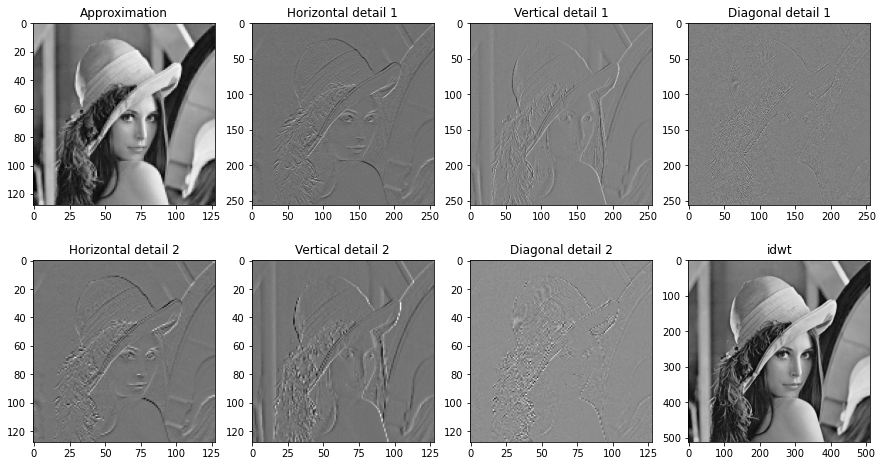

In [24]:
img = cv2.imread('../data/lenna.png')
img_f32 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

coeffs = pywt.dwt2(img_f32, 'haar')
cA, (cH, cV, cD) = coeffs

# plt.figure(figsize=(8,8))
# for i, img in enumerate((cA, cH, cV, cD)):
#     plt.subplot(2,2,i+1)
#     plt.imshow(img, 'gray')
    
# A H
# V D
# A: 原图信息（低频）
# H：水平高频信息
# V：垂直高频信息
# D：对角高频信息

coeffs2 = pywt.dwt2(cA, 'haar')
cA2, (cH2, cV2, cD2) = coeffs2
title = ('Approximation', 'Horizontal detail 1', 
         'Vertical detail 1', 'Diagonal detail 1', 
         'Horizontal detail 2', 'Vertical detail 2', 'Diagonal detail 2')
plt.figure(figsize=(15,8))
for i, img in enumerate((cA2, cH, cV, cD, cH2, cV2, cD2)):
    axes = plt.subplot(2,4,i+1)
    plt.imshow(img, 'gray')
    axes.set_title(title[i])


# 重建
axes = plt.subplot(2,4,8)
re_img = pywt.idwt2(coeffs, 'haar')
plt.imshow(re_img, 'gray')
axes.set_title('idwt')